#### Bobba 2022 abridged QC

**Objective**: Run QC steps without normalisation/UMAP for Bobba 2022 data

- **Developed by**: Mairi McClean
- **Affiliation**: Institute of Computational Biology, Helmholtz Zentrum Munich
- **v230308**

### Import required modules

In [1]:
import anndata
import logging
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sns
import scrublet as scr
import matplotlib.pyplot as plt
import tk
from matplotlib import colors
from matplotlib import rcParams

#### Log file and figure output settings

In [2]:
sc.settings.verbosity = 3
sc.logging.print_versions()
sc.settings.set_figure_params(dpi = 160, color_map = 'RdPu', dpi_save = 180, vector_friendly = True, format = 'svg')

-----
anndata     0.9.1
scanpy      1.9.3
-----
CoreFoundation      NA
Foundation          NA
PIL                 9.5.0
PyObjCTools         NA
anyio               NA
appnope             0.1.3
asttokens           NA
attr                23.1.0
babel               2.12.1
backcall            0.2.0
certifi             2023.05.07
cffi                1.15.1
charset_normalizer  3.1.0
cloudpickle         2.2.1
colorama            0.4.6
comm                0.1.3
cycler              0.10.0
cython_runtime      NA
cytoolz             0.12.0
dask                2023.5.1
dateutil            2.8.2
debugpy             1.6.7
decorator           5.1.1
defusedxml          0.7.1
executing           1.2.0
fastjsonschema      NA
h5py                3.8.0
idna                3.4
igraph              0.10.4
importlib_resources NA
ipykernel           6.23.1
jedi                0.18.2
jinja2              3.1.2
joblib              1.2.0
json5               NA
jsonschema          4.17.3
jupyter_events      0.6.3
ju

### Read in datasets

##### Control data

In [3]:
adata_1 = sc.read_10x_mtx('/Volumes/LaCie/data_lake/Mairi_example/INBOX/sc_downloads/bobba_2022/GSE176423_RAW/ctl/')
adata_1

--> This might be very slow. Consider passing `cache=True`, which enables much faster reading from a cache file.


AnnData object with n_obs × n_vars = 661 × 27998
    var: 'gene_ids'

##### h445y

In [4]:
adata_2 = sc.read_10x_mtx('/Volumes/LaCie/data_lake/Mairi_example/INBOX/sc_downloads/bobba_2022/GSE176423_RAW/h445y/')
adata_2


--> This might be very slow. Consider passing `cache=True`, which enables much faster reading from a cache file.


AnnData object with n_obs × n_vars = 1849 × 27998
    var: 'gene_ids'

##### hn878

In [5]:
adata_3 = sc.read_10x_mtx('/Volumes/Lacie/data_lake/Mairi_example/INBOX/sc_downloads/bobba_2022/GSE176423_RAW/hn878/')
adata_3


--> This might be very slow. Consider passing `cache=True`, which enables much faster reading from a cache file.


AnnData object with n_obs × n_vars = 858 × 27998
    var: 'gene_ids'

In [6]:
adata_2.var


,gene_ids
Xkr4,ENSMUSG00000051951
Gm1992,ENSMUSG00000089699
Gm37381,ENSMUSG00000102343
Rp1,ENSMUSG00000025900
Rp1-1,ENSMUSG00000109048
...,...
AC168977.1,ENSMUSG00000079808
PISD,ENSMUSG00000095041
DHRSX,ENSMUSG00000063897
Vmn2r122,ENSMUSG00000096730


In [7]:
adata_3.obs

""
AAACGAAGTCGCTTGG-1
AAACGAATCCATCACC-1
AAAGAACTCATTTGCT-1
AAAGGGCCAACAAGAT-1
AAAGGGCCAGTAACGG-1
...
TTTCAGTTCGAGGCAA-1
TTTCATGAGGTTAGTA-1
TTTCCTCTCTCCACTG-1
TTTGATCTCCCTGGTT-1


### Make names unique

In [8]:
adata_1.var_names_make_unique()
adata_2.var_names_make_unique()
adata_3.var_names_make_unique()

#### Concatenate objects

In [9]:
adata_total = adata_1.concatenate(adata_2, adata_3, join="inner", batch_key="batch")
adata_total

/Users/mairi.mcclean/mambaforge/envs/new_scanpy_local/lib/python3.9/site-packages/anndata/_core/anndata.py:1755: FutureWarning: The AnnData.concatenate method is deprecated in favour of the anndata.concat function. Please use anndata.concat instead.

See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  warnings.warn(


AnnData object with n_obs × n_vars = 3368 × 27998
    obs: 'batch'
    var: 'gene_ids'

In [10]:
# Make names unique to avoid computational issues re repeated gene names
adata_total.var_names_make_unique()
sample_object = adata_total.copy()
sample_object

AnnData object with n_obs × n_vars = 3368 × 27998
    obs: 'batch'
    var: 'gene_ids'

In [11]:
sample_object.var_names = [str(i) for i in sample_object.var_names]
sample_object.var_names_make_unique()

### Top 20 scatterplot

normalizing counts per cell
    finished (0:00:00)


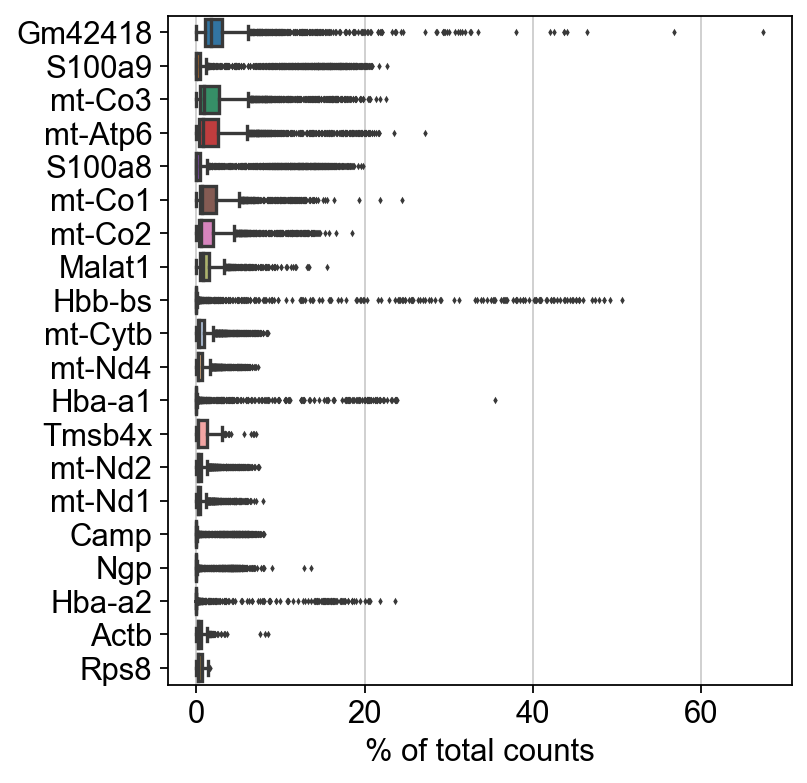

In [12]:
%matplotlib inline

sc.pl.highest_expr_genes(sample_object, n_top=20)
plt.show()

### Initial filtering

- By gene

In [13]:
sc.pp.filter_cells(sample_object, min_genes = 200)
print(sample_object.n_obs, sample_object.n_vars)

filtered out 65 cells that have less than 200 genes expressed
3303 27998


In [14]:
sample_object.shape

(3303, 27998)

- By cell

In [15]:
sc.pp.filter_genes(sample_object, min_cells = 3)
sample_object.shape

filtered out 11824 genes that are detected in less than 3 cells


(3303, 16174)

### QC metrics

In [16]:
sample_object.var['mt'] = sample_object.var_names.str.startswith('mt-')
sample_object.var['ribo'] = sample_object.var_names.str.startswith(("Rps","Rpl"))
sample_object.var["hb"] = sample_object.var_names.str.contains(("^Hb[^(P)]"))
sample_object.var

,gene_ids,n_cells,mt,ribo,hb
Mrpl15,ENSMUSG00000033845,1553,False,False,False
Lypla1,ENSMUSG00000025903,1335,False,False,False
Gm37988,ENSMUSG00000104217,12,False,False,False
Tcea1,ENSMUSG00000033813,1947,False,False,False
Rgs20,ENSMUSG00000002459,7,False,False,False
...,...,...,...,...,...
AC125149.3,ENSMUSG00000079800,24,False,False,False
AC168977.1,ENSMUSG00000079808,21,False,False,False
PISD,ENSMUSG00000095041,2016,False,False,False
DHRSX,ENSMUSG00000063897,1043,False,False,False


In [17]:
sample_object.var['mt'].value_counts()

mt
False    16161
True        13
Name: count, dtype: int64

In [18]:
sample_object.var['ribo'].value_counts()

ribo
False    16065
True       109
Name: count, dtype: int64

In [19]:
sample_object.var['hb'].value_counts()

hb
False    16163
True        11
Name: count, dtype: int64

In [20]:
sc.pp.calculate_qc_metrics(sample_object, qc_vars = ['mt', 'ribo', 'hb'], percent_top = None, log1p = False, inplace = True)

In [21]:
sample_object.obs

,batch,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,total_counts_ribo,pct_counts_ribo,total_counts_hb,pct_counts_hb
AAACCCATCTGAGGCC-1-0,0,6054,6054,52988.0,2511.0,4.738809,15506.0,29.263227,4.0,0.007549
AAACGAAAGAGGTTTA-1-0,0,6844,6843,66146.0,3134.0,4.738004,18605.0,28.127172,2.0,0.003024
AAAGAACAGTTGTCAC-1-0,0,228,228,1616.0,1322.0,81.806931,59.0,3.650990,1.0,0.061881
AAAGAACCAAGTGGCA-1-0,0,247,247,696.0,366.0,52.586208,82.0,11.781609,3.0,0.431034
AAAGAACGTAGCGTCC-1-0,0,6953,6949,91565.0,4116.0,4.495167,26007.0,28.402773,426.0,0.465243
...,...,...,...,...,...,...,...,...,...,...
TTTCAGTTCGAGGCAA-1-2,2,5042,5041,44439.0,654.0,1.471680,2806.0,6.314273,9.0,0.020252
TTTCATGAGGTTAGTA-1-2,2,6055,6054,52667.0,2513.0,4.771489,17536.0,33.295994,3.0,0.005696
TTTCCTCTCTCCACTG-1-2,2,2810,2810,16101.0,130.0,0.807403,371.0,2.304205,2.0,0.012422
TTTGATCTCCCTGGTT-1-2,2,4479,4478,17931.0,835.0,4.656740,3495.0,19.491383,2.0,0.011154


- QC visualisation

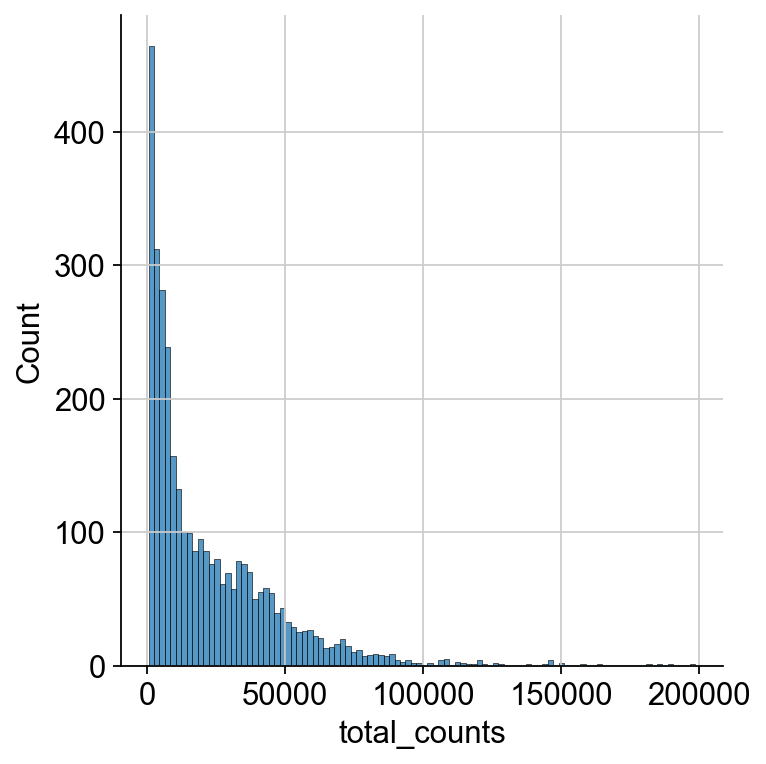

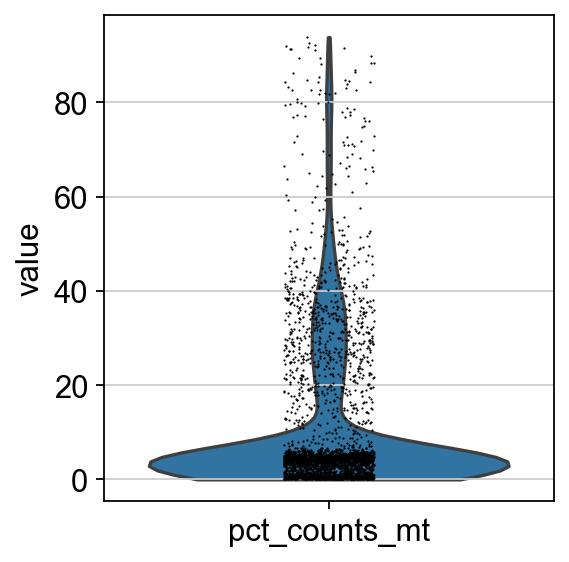

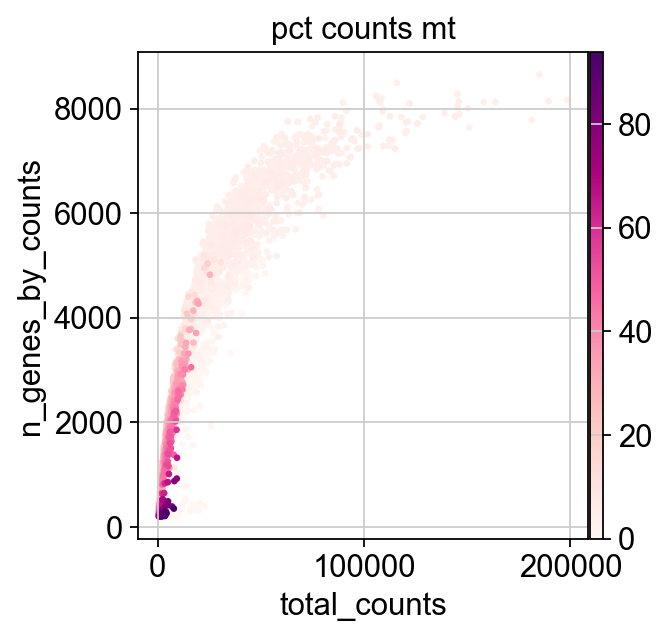

In [22]:
p1 = sns.displot(sample_object.obs["total_counts"], bins=100, kde=False)
# sc.pl.violin(adata, 'total_counts')
p2 = sc.pl.violin(sample_object, "pct_counts_mt")
p3 = sc.pl.scatter(sample_object, "total_counts", "n_genes_by_counts", color="pct_counts_mt")

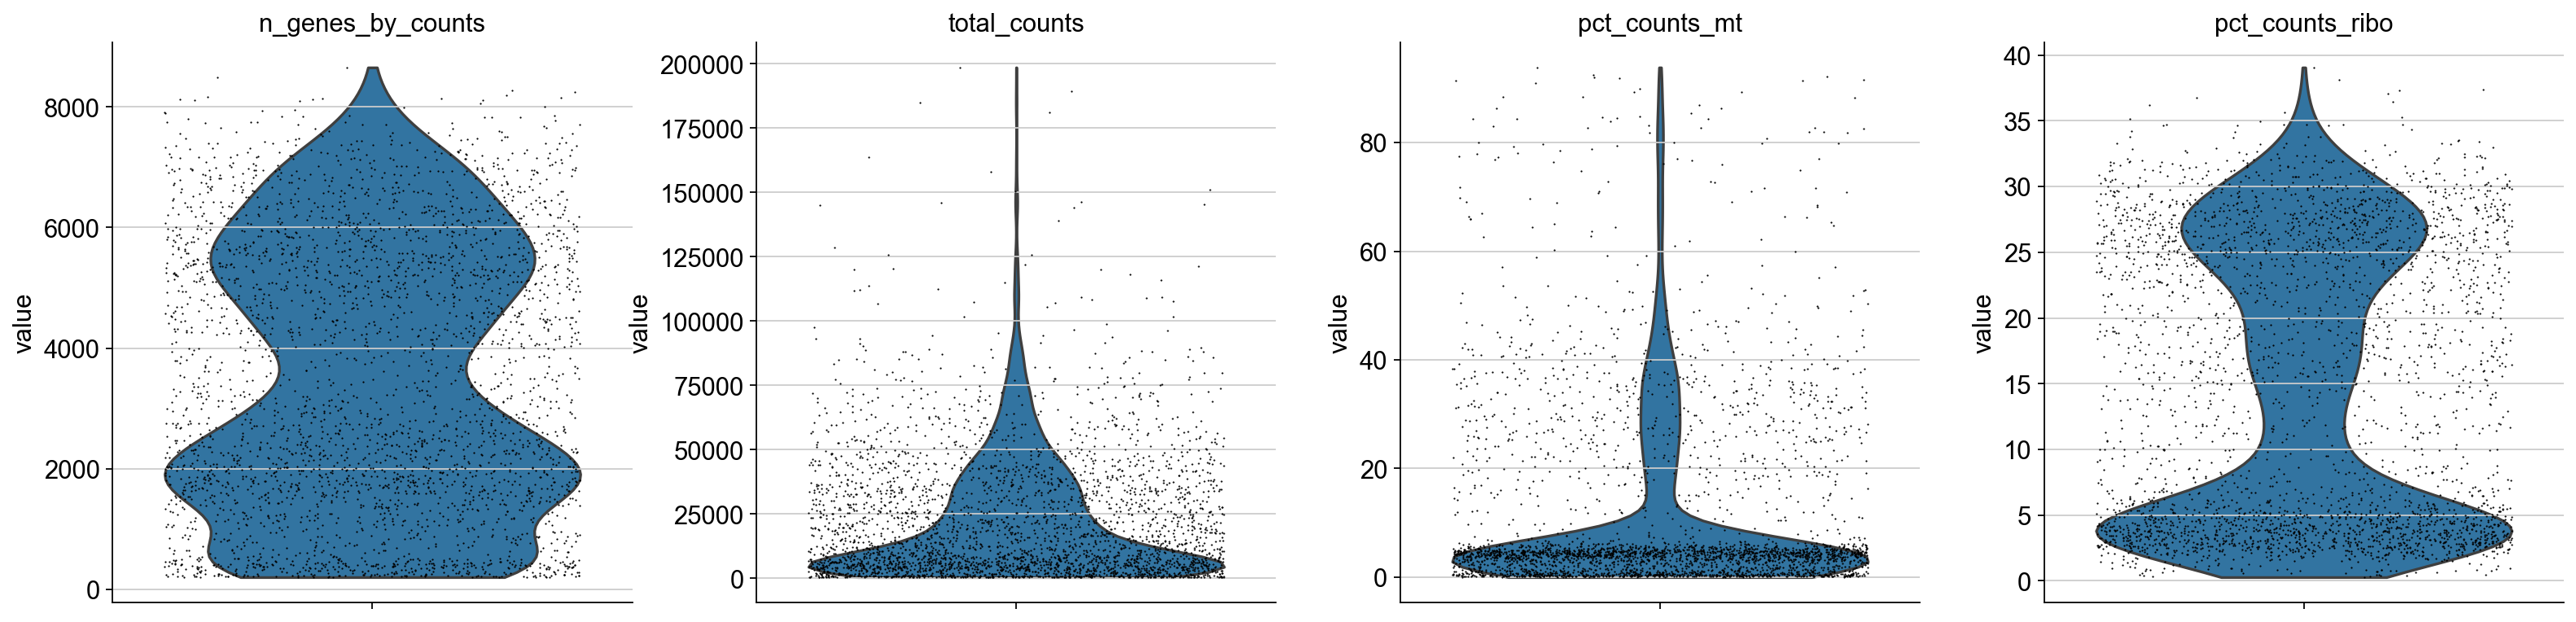

In [23]:
sc.pl.violin(sample_object, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt', 'pct_counts_ribo'],
             jitter=0.4, multi_panel=True)

In [24]:
sample_object.obs

,batch,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,total_counts_ribo,pct_counts_ribo,total_counts_hb,pct_counts_hb
AAACCCATCTGAGGCC-1-0,0,6054,6054,52988.0,2511.0,4.738809,15506.0,29.263227,4.0,0.007549
AAACGAAAGAGGTTTA-1-0,0,6844,6843,66146.0,3134.0,4.738004,18605.0,28.127172,2.0,0.003024
AAAGAACAGTTGTCAC-1-0,0,228,228,1616.0,1322.0,81.806931,59.0,3.650990,1.0,0.061881
AAAGAACCAAGTGGCA-1-0,0,247,247,696.0,366.0,52.586208,82.0,11.781609,3.0,0.431034
AAAGAACGTAGCGTCC-1-0,0,6953,6949,91565.0,4116.0,4.495167,26007.0,28.402773,426.0,0.465243
...,...,...,...,...,...,...,...,...,...,...
TTTCAGTTCGAGGCAA-1-2,2,5042,5041,44439.0,654.0,1.471680,2806.0,6.314273,9.0,0.020252
TTTCATGAGGTTAGTA-1-2,2,6055,6054,52667.0,2513.0,4.771489,17536.0,33.295994,3.0,0.005696
TTTCCTCTCTCCACTG-1-2,2,2810,2810,16101.0,130.0,0.807403,371.0,2.304205,2.0,0.012422
TTTGATCTCCCTGGTT-1-2,2,4479,4478,17931.0,835.0,4.656740,3495.0,19.491383,2.0,0.011154


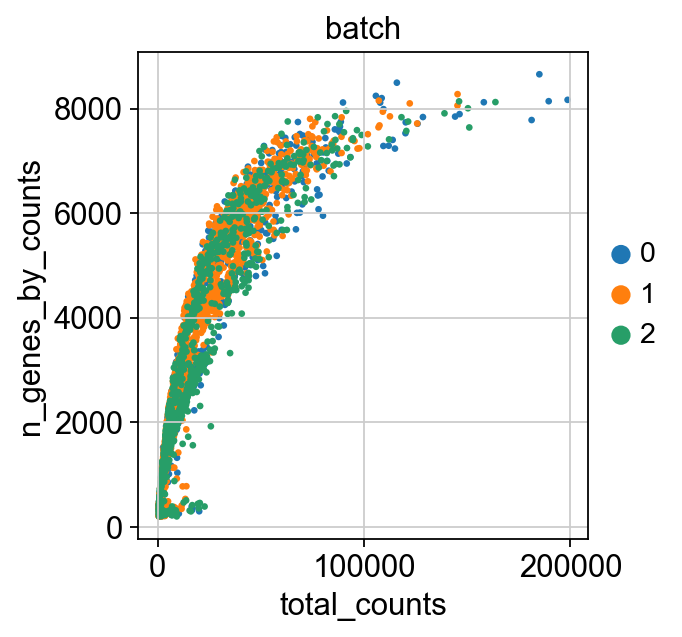

In [25]:
sc.pl.scatter(sample_object, x='total_counts', y='n_genes_by_counts', color = "batch")

### QC-based filtering

In [26]:
sample_object.obs.head()

,batch,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,total_counts_ribo,pct_counts_ribo,total_counts_hb,pct_counts_hb
AAACCCATCTGAGGCC-1-0,0,6054,6054,52988.0,2511.0,4.738809,15506.0,29.263227,4.0,0.007549
AAACGAAAGAGGTTTA-1-0,0,6844,6843,66146.0,3134.0,4.738004,18605.0,28.127172,2.0,0.003024
AAAGAACAGTTGTCAC-1-0,0,228,228,1616.0,1322.0,81.806931,59.0,3.650990,1.0,0.061881
AAAGAACCAAGTGGCA-1-0,0,247,247,696.0,366.0,52.586208,82.0,11.781609,3.0,0.431034
AAAGAACGTAGCGTCC-1-0,0,6953,6949,91565.0,4116.0,4.495167,26007.0,28.402773,426.0,0.465243


In [27]:
sample_object.shape

(3303, 16174)

In [28]:
sample_object.obs["mt_ok"] = sample_object.obs['pct_counts_mt'] <= 20
sample_object.obs.head()


,batch,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,total_counts_ribo,pct_counts_ribo,total_counts_hb,pct_counts_hb,mt_ok
AAACCCATCTGAGGCC-1-0,0,6054,6054,52988.0,2511.0,4.738809,15506.0,29.263227,4.0,0.007549,True
AAACGAAAGAGGTTTA-1-0,0,6844,6843,66146.0,3134.0,4.738004,18605.0,28.127172,2.0,0.003024,True
AAAGAACAGTTGTCAC-1-0,0,228,228,1616.0,1322.0,81.806931,59.0,3.650990,1.0,0.061881,False
AAAGAACCAAGTGGCA-1-0,0,247,247,696.0,366.0,52.586208,82.0,11.781609,3.0,0.431034,False
AAAGAACGTAGCGTCC-1-0,0,6953,6949,91565.0,4116.0,4.495167,26007.0,28.402773,426.0,0.465243,True


In [29]:
sample_object.obs.mt_ok.value_counts()

mt_ok
True     2623
False     680
Name: count, dtype: int64

In [30]:
print(f"Total number of cells: {sample_object.n_obs}")
sample_object = sample_object[(sample_object.obs.mt_ok)].copy()

print(f"Number of cells after filtering of low quality cells: {sample_object.n_obs}")

Total number of cells: 3303
Number of cells after filtering of low quality cells: 2623


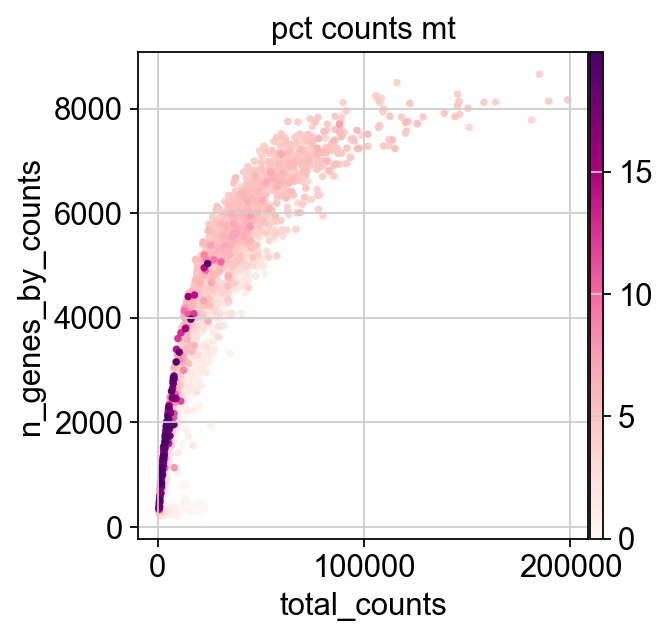

In [31]:
p1 = sc.pl.scatter(sample_object, "total_counts", "n_genes_by_counts", color="pct_counts_mt")

### Add sample sex covariate

In [32]:
import pybiomart as biomart

In [33]:
annot = sc.queries.biomart_annotations(
        "mmusculus",
        ["ensembl_gene_id", "external_gene_name", "start_position", "end_position", "chromosome_name"],
    ).set_index("external_gene_name")

In [34]:
annot.head()

,ensembl_gene_id,start_position,end_position,chromosome_name
external_gene_name,,,,
mt-Tf,ENSMUSG00000064336,1,68,MT
mt-Rnr1,ENSMUSG00000064337,70,1024,MT
mt-Tv,ENSMUSG00000064338,1025,1093,MT
mt-Rnr2,ENSMUSG00000064339,1094,2675,MT
mt-Tl1,ENSMUSG00000064340,2676,2750,MT


- Y chrom

In [35]:
annot.chromosome_name.value_counts()

chromosome_name
7             4820
2             3891
1             3549
5             3345
6             3219
11            3125
3             2955
4             2948
9             2911
10            2693
X             2662
8             2628
14            2562
13            2560
12            2552
17            2400
15            1933
16            1649
Y             1629
19            1457
18            1428
MT              37
JH584299.1      12
GL456211.1       7
GL456221.1       7
GL456354.1       5
GL456210.1       5
JH584298.1       3
JH584297.1       3
JH584296.1       3
GL456212.1       2
GL456385.1       2
GL456219.1       2
JH584304.1       1
GL456372.1       1
JH584303.1       1
GL456381.1       1
GL456239.1       1
JH584295.1       1
Name: count, dtype: int64

In [36]:
chrY_genes = sample_object.var_names.intersection(annot.index[annot.chromosome_name == "Y"])
chrY_genes

Index([], dtype='object')

In [37]:
# List of gene names on Y chromosome
desired_category = "Y"

# Select rows based on the category
selected_rows = annot[annot['chromosome_name'] == desired_category]
selected_rows.value_counts()

ensembl_gene_id     start_position  end_position  chromosome_name
ENSMUSG00000000103  2106015         2170409       Y                  1
ENSMUSG00000101512  65840255        65843494      Y                  1
ENSMUSG00000101530  64569362        64570055      Y                  1
ENSMUSG00000101529  67727701        67731047      Y                  1
ENSMUSG00000101528  74481800        74508227      Y                  1
                                                                    ..
ENSMUSG00000100288  85642562        85644875      Y                  1
ENSMUSG00000100286  80547675        80551023      Y                  1
ENSMUSG00000100285  3383123         3384035       Y                  1
ENSMUSG00000100284  83628709        83629404      Y                  1
ENSMUSG00002076920  991657          991716        Y                  1
Name: count, Length: 1629, dtype: int64

In [38]:
is_present = selected_rows.isin(sample_object.var_names.values)

any_present = is_present.any().any()

# Print the result
print(any_present)

False


In [39]:
# Compare annot with sample_object.var by gene_id

# Convert the var dataframe of AnnData object to pandas dataframe
df_var = pd.DataFrame(sample_object.var)
df_var


,gene_ids,n_cells,mt,ribo,hb,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts
Mrpl15,ENSMUSG00000033845,1553,False,False,False,1553,1.938541,52.982137,6403.0
Lypla1,ENSMUSG00000025903,1335,False,False,False,1335,0.781108,59.582198,2580.0
Gm37988,ENSMUSG00000104217,12,False,False,False,12,0.003633,99.636694,12.0
Tcea1,ENSMUSG00000033813,1947,False,False,False,1947,3.352710,41.053588,11074.0
Rgs20,ENSMUSG00000002459,7,False,False,False,7,0.002119,99.788071,7.0
...,...,...,...,...,...,...,...,...,...
AC125149.3,ENSMUSG00000079800,24,False,False,False,24,0.008174,99.273388,27.0
AC168977.1,ENSMUSG00000079808,21,False,False,False,21,0.006358,99.364214,21.0
PISD,ENSMUSG00000095041,2016,False,False,False,2016,2.602785,38.964578,8597.0
DHRSX,ENSMUSG00000063897,1043,False,False,False,1043,0.562822,68.422646,1859.0


In [40]:
df_var.rename(columns={'gene_ids': 'ensembl_gene_id'}, inplace=True)
df_var

,ensembl_gene_id,n_cells,mt,ribo,hb,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts
Mrpl15,ENSMUSG00000033845,1553,False,False,False,1553,1.938541,52.982137,6403.0
Lypla1,ENSMUSG00000025903,1335,False,False,False,1335,0.781108,59.582198,2580.0
Gm37988,ENSMUSG00000104217,12,False,False,False,12,0.003633,99.636694,12.0
Tcea1,ENSMUSG00000033813,1947,False,False,False,1947,3.352710,41.053588,11074.0
Rgs20,ENSMUSG00000002459,7,False,False,False,7,0.002119,99.788071,7.0
...,...,...,...,...,...,...,...,...,...
AC125149.3,ENSMUSG00000079800,24,False,False,False,24,0.008174,99.273388,27.0
AC168977.1,ENSMUSG00000079808,21,False,False,False,21,0.006358,99.364214,21.0
PISD,ENSMUSG00000095041,2016,False,False,False,2016,2.602785,38.964578,8597.0
DHRSX,ENSMUSG00000063897,1043,False,False,False,1043,0.562822,68.422646,1859.0


In [41]:
# Merge df_var with annot
merged_df = df_var.merge(annot, on='ensembl_gene_id', how='left')
merged_df

,ensembl_gene_id,n_cells,mt,ribo,hb,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts,start_position,end_position,chromosome_name
0,ENSMUSG00000033845,1553,False,False,False,1553,1.938541,52.982137,6403.0,4843429.0,4855962.0,1
1,ENSMUSG00000025903,1335,False,False,False,1335,0.781108,59.582198,2580.0,4878011.0,4918633.0,1
2,ENSMUSG00000104217,12,False,False,False,12,0.003633,99.636694,12.0,4878115.0,4956993.0,1
3,ENSMUSG00000033813,1947,False,False,False,1947,3.352710,41.053588,11074.0,4928037.0,4968132.0,1
4,ENSMUSG00000002459,7,False,False,False,7,0.002119,99.788071,7.0,4979799.0,5140508.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
16169,ENSMUSG00000079800,24,False,False,False,24,0.008174,99.273388,27.0,9124.0,58882.0,GL456210.1
16170,ENSMUSG00000079808,21,False,False,False,21,0.006358,99.364214,21.0,128555.0,150452.0,GL456212.1
16171,ENSMUSG00000095041,2016,False,False,False,2016,2.602785,38.964578,8597.0,52190.0,59690.0,JH584304.1
16172,ENSMUSG00000063897,1043,False,False,False,1043,0.562822,68.422646,1859.0,NaN,NaN,NaN


In [42]:
merged_df.chromosome_name.value_counts()

chromosome_name
11            1293
7             1240
2             1227
5             1055
1              999
4              983
9              881
6              849
8              830
3              816
17             796
10             749
13             611
15             581
12             537
19             532
14             526
X              519
16             497
18             386
MT              13
GL456221.1       2
Y                1
GL456211.1       1
GL456210.1       1
GL456212.1       1
JH584304.1       1
JH584295.1       1
Name: count, dtype: int64

In [43]:
# Find identity of gene on Y
desired_value = 'Y'

# Find row where the column value matches the desired value
matching_rows = merged_df[merged_df['chromosome_name'] == desired_value]

print(matching_rows)

          ensembl_gene_id  n_cells     mt   ribo     hb  n_cells_by_counts  \
15219  ENSMUSG00000096768     1821  False  False  False               1821   

       mean_counts  pct_dropout_by_counts  total_counts  start_position  \
15219     3.033909              44.868302       10021.0      90796007.0   

       end_position chromosome_name  
15219    90827734.0               Y  


In [44]:
sample_object.var

,gene_ids,n_cells,mt,ribo,hb,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts
Mrpl15,ENSMUSG00000033845,1553,False,False,False,1553,1.938541,52.982137,6403.0
Lypla1,ENSMUSG00000025903,1335,False,False,False,1335,0.781108,59.582198,2580.0
Gm37988,ENSMUSG00000104217,12,False,False,False,12,0.003633,99.636694,12.0
Tcea1,ENSMUSG00000033813,1947,False,False,False,1947,3.352710,41.053588,11074.0
Rgs20,ENSMUSG00000002459,7,False,False,False,7,0.002119,99.788071,7.0
...,...,...,...,...,...,...,...,...,...
AC125149.3,ENSMUSG00000079800,24,False,False,False,24,0.008174,99.273388,27.0
AC168977.1,ENSMUSG00000079808,21,False,False,False,21,0.006358,99.364214,21.0
PISD,ENSMUSG00000095041,2016,False,False,False,2016,2.602785,38.964578,8597.0
DHRSX,ENSMUSG00000063897,1043,False,False,False,1043,0.562822,68.422646,1859.0


In [45]:
# Check if there are shared genes present in sample_object and annot

is_present = sample_object.var['gene_ids'].isin(annot['ensembl_gene_id'])
is_present.value_counts()

gene_ids
True     15928
False      246
Name: count, dtype: int64

- X chrom

In [46]:
chrX_genes = sample_object.var_names.intersection(annot.index[annot.chromosome_name == "X"])
chrX_genes

Index(['Nudt11', 'Shroom4', 'Ccnb3', 'Clcn5', 'Usp27x', 'Ppp1r3f', 'Ccdc22',
       'Cacna1f', 'Syp', 'Gm14703',
       ...
       'Tlr8', 'Tlr7', 'Prps2', 'Msl3', 'Arhgap6', 'Gm15261', 'Hccs', 'Mid1',
       'Gm15726', 'Gm15247'],
      dtype='object', length=488)

In [47]:
chrX_sum = sample_object[:, chrX_genes].X.sum(axis=1)
total_sum = sample_object.X.sum(axis=1)

# Flatten the arrays and calculate percent_chrY
sample_object.obs['percent_chrX'] = (np.asarray(chrX_sum).flatten() / np.asarray(total_sum).flatten()) * 100
sample_object.obs

,batch,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,total_counts_ribo,pct_counts_ribo,total_counts_hb,pct_counts_hb,mt_ok,percent_chrX
AAACCCATCTGAGGCC-1-0,0,6054,6054,52988.0,2511.0,4.738809,15506.0,29.263227,4.0,0.007549,True,3.608364
AAACGAAAGAGGTTTA-1-0,0,6844,6843,66146.0,3134.0,4.738004,18605.0,28.127172,2.0,0.003024,True,3.430290
AAAGAACGTAGCGTCC-1-0,0,6953,6949,91565.0,4116.0,4.495167,26007.0,28.402773,426.0,0.465243,True,2.737946
AAAGGATAGATAGGGA-1-0,0,1890,1889,7691.0,31.0,0.403069,174.0,2.262385,1.0,0.013002,True,3.068521
AAAGGGCAGAACGTGC-1-0,0,3165,3164,10707.0,387.0,3.614458,1727.0,16.129635,2.0,0.018679,True,5.174185
...,...,...,...,...,...,...,...,...,...,...,...,...
TTTCAGTTCGAGGCAA-1-2,2,5042,5041,44439.0,654.0,1.471680,2806.0,6.314273,9.0,0.020252,True,3.082878
TTTCATGAGGTTAGTA-1-2,2,6055,6054,52667.0,2513.0,4.771489,17536.0,33.295994,3.0,0.005696,True,3.740483
TTTCCTCTCTCCACTG-1-2,2,2810,2810,16101.0,130.0,0.807403,371.0,2.304205,2.0,0.012422,True,3.453202
TTTGATCTCCCTGGTT-1-2,2,4479,4478,17931.0,835.0,4.656740,3495.0,19.491383,2.0,0.011154,True,4.126931


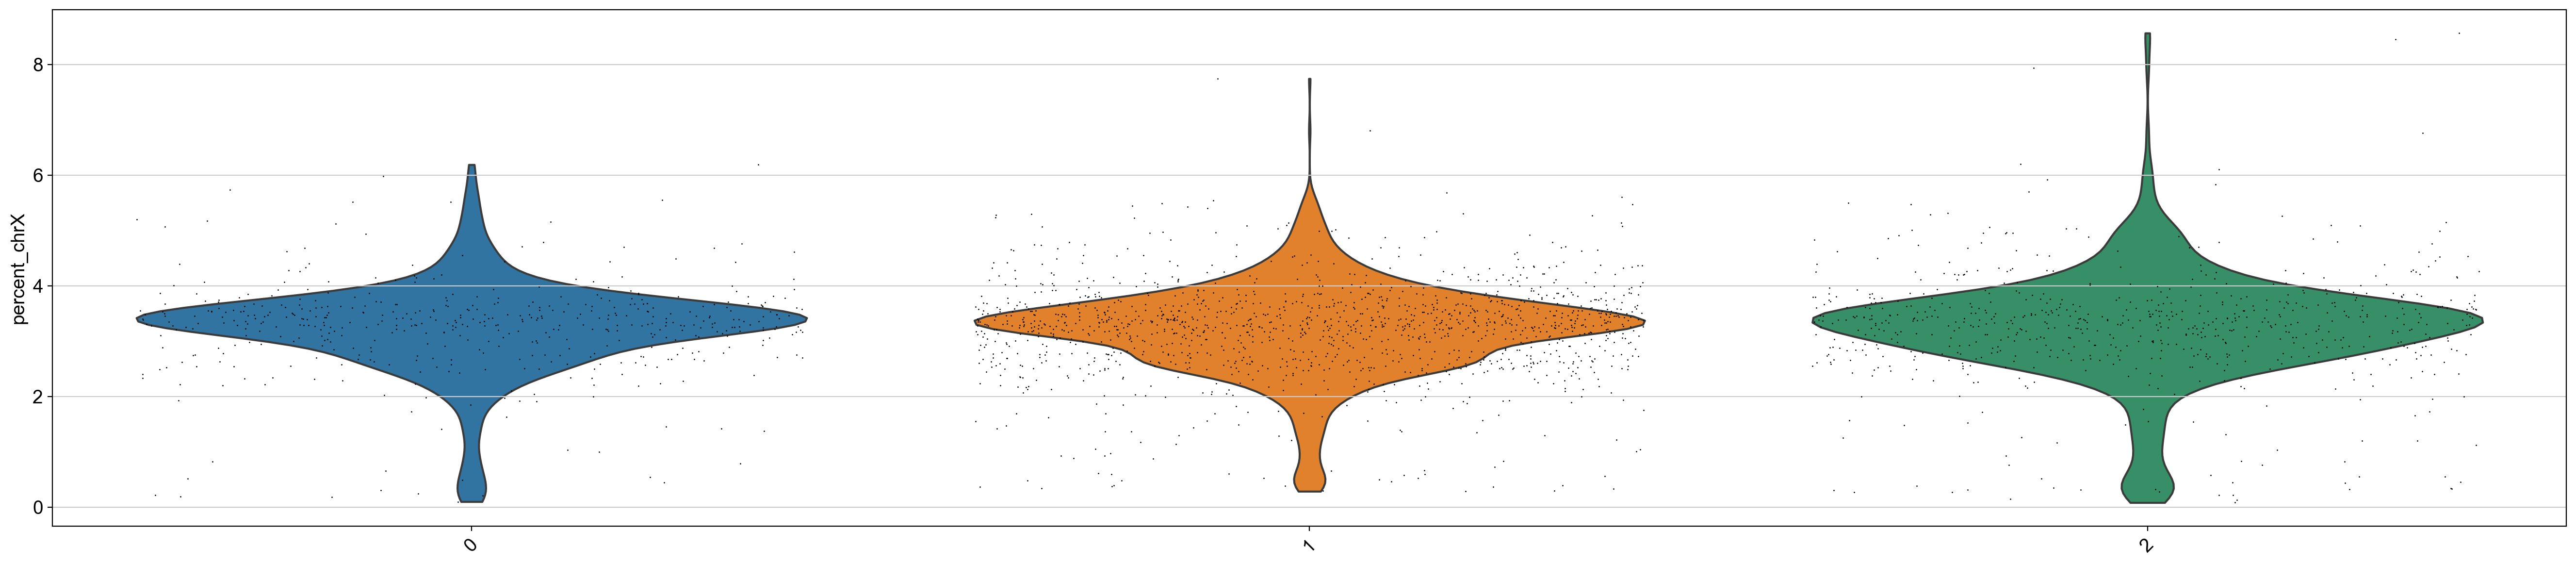

In [48]:
sc.set_figure_params(figsize=(25, 7),dpi=100)
sc.pl.violin(sample_object, ["percent_chrX"], jitter = 0.4, groupby = 'batch', rotation = 45)

### Cell cycle scores

In [49]:
!if [ ! -f /Users/mairi.mcclean/data/qc_files/mus_musculus_cell_cycle_list.txt ]; then curl -o /Users/mairi.mcclean/data/qc_files/mus_musculus_cell_cycle_list.txt https://raw.githubusercontent.com/hbc/tinyatlas/master/cell_cycle/Mus_musculus.csv

zsh:1: parse error near `https://raw.githubus...'


In [50]:
cell_cycle_genes = [x.strip() for x in open('/Users/mairi.mcclean/data/qc_files/mus_musculus_cell_cycle_list.txt')]
print(len(cell_cycle_genes))

# Split into 2 lists
g2m_genes = cell_cycle_genes[:54]
s_genes = cell_cycle_genes[54:]

cell_cycle_genes = [x for x in cell_cycle_genes if x in sample_object.var_names]
print(len(cell_cycle_genes))

97
96


In [51]:
# create other anndata object for score calculation

adata_log = anndata.AnnData(X = sample_object.X,  var = sample_object.var, obs = sample_object.obs)
sc.pp.normalize_total(adata_log, target_sum = 1e6, exclude_highly_expressed = True)
sc.pp.log1p(adata_log)

normalizing counts per cell The following highly-expressed genes are not considered during normalization factor computation:
['Prg2', 'Tmsb4x', 'S100a8', 'S100a9', 'Chil3', 'Jchain', 'Actb', 'Hbb-bt', 'Hbb-bs', 'Lyz2', 'Mcpt8', 'Camp', 'Ngp', 'Ltf', 'Hba-a1', 'Hba-a2', 'Retnlg', 'Prss34', 'Gm42418', 'Malat1', 'mt-Co1', 'mt-Co2', 'mt-Atp6', 'mt-Co3']
    finished (0:00:00)


In [52]:
sample_object

AnnData object with n_obs × n_vars = 2623 × 16174
    obs: 'batch', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'pct_counts_hb', 'mt_ok', 'percent_chrX'
    var: 'gene_ids', 'n_cells', 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'batch_colors'

calculating cell cycle phase
computing score 'S_score'
    finished: added
    'S_score', score of gene set (adata.obs).
    387 total control genes are used. (0:00:00)
computing score 'G2M_score'
    finished: added
    'G2M_score', score of gene set (adata.obs).
    513 total control genes are used. (0:00:00)
-->     'phase', cell cycle phase (adata.obs)


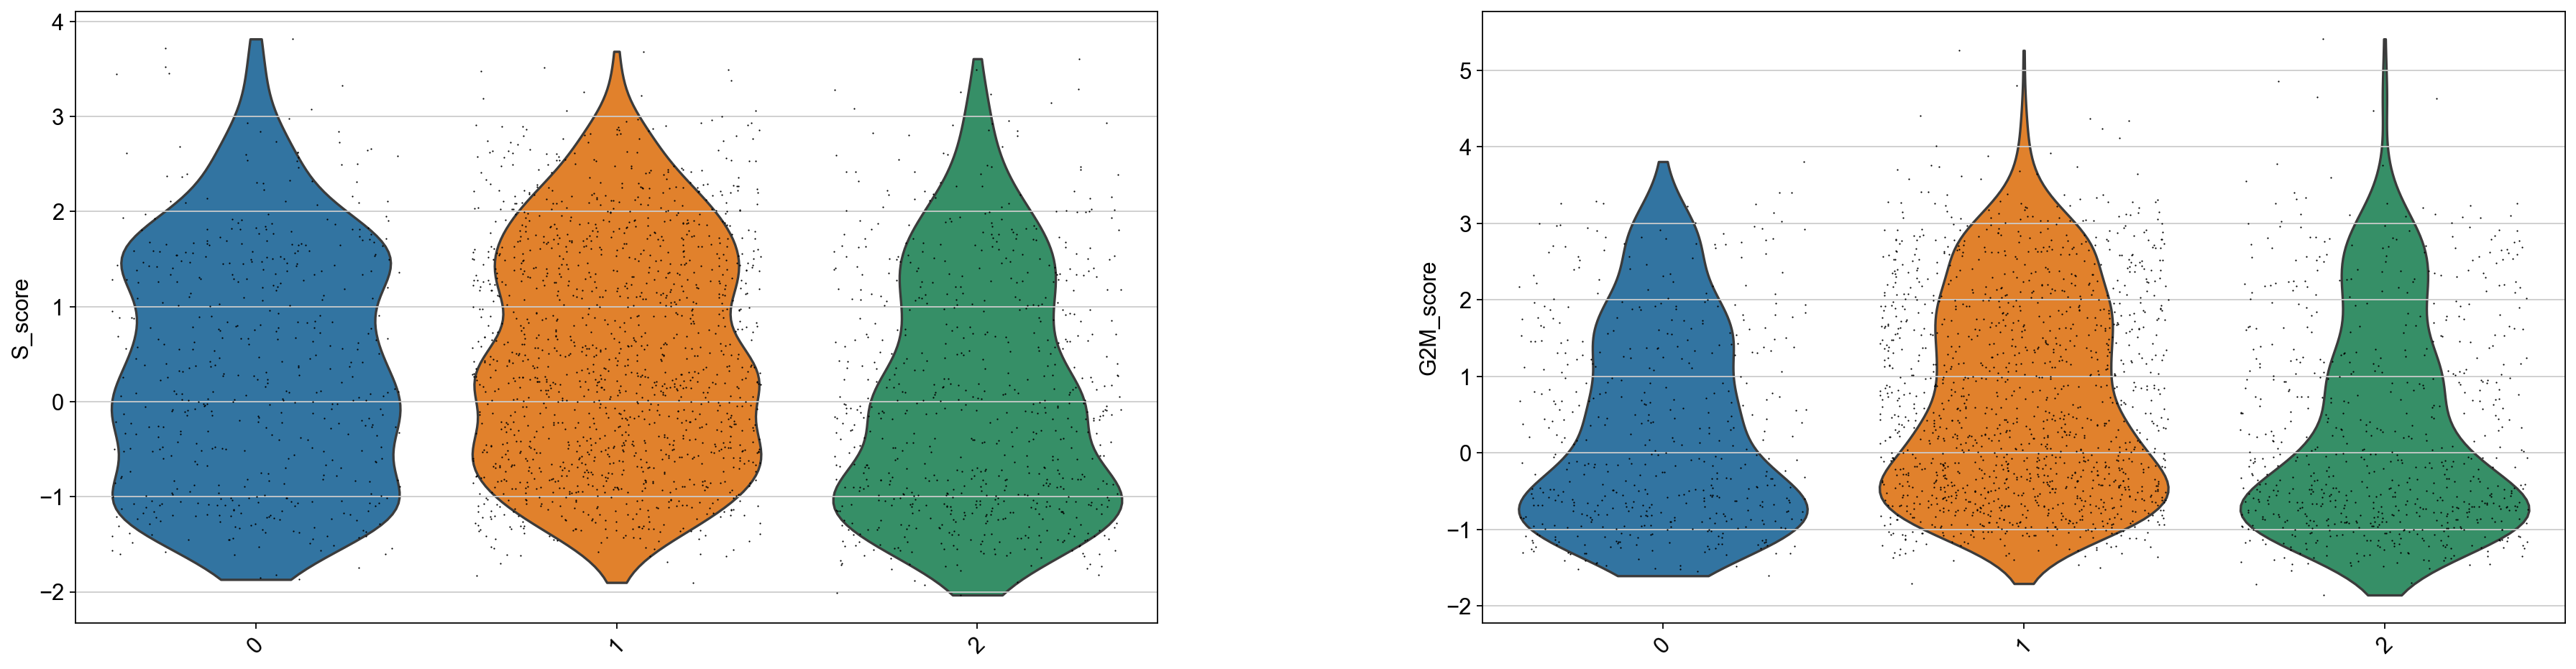

In [53]:
# Set specific figure params
sc.set_figure_params(figsize=(10, 7))

sc.tl.score_genes_cell_cycle(adata_log, s_genes = s_genes, g2m_genes = g2m_genes)
sc.pl.violin(adata_log, ['S_score', 'G2M_score'],
             jitter = 0.4, groupby = 'batch', rotation = 45)

In [54]:
sample_object.obs['S_score'] = adata_log.obs['S_score']
sample_object.obs['G2M_score'] = adata_log.obs['G2M_score']
sample_object

AnnData object with n_obs × n_vars = 2623 × 16174
    obs: 'batch', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'pct_counts_hb', 'mt_ok', 'percent_chrX', 'S_score', 'G2M_score'
    var: 'gene_ids', 'n_cells', 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'batch_colors'

computing PCA
    with n_comps=50
    finished (0:00:00)


/Users/mairi.mcclean/mambaforge/envs/new_scanpy_local/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


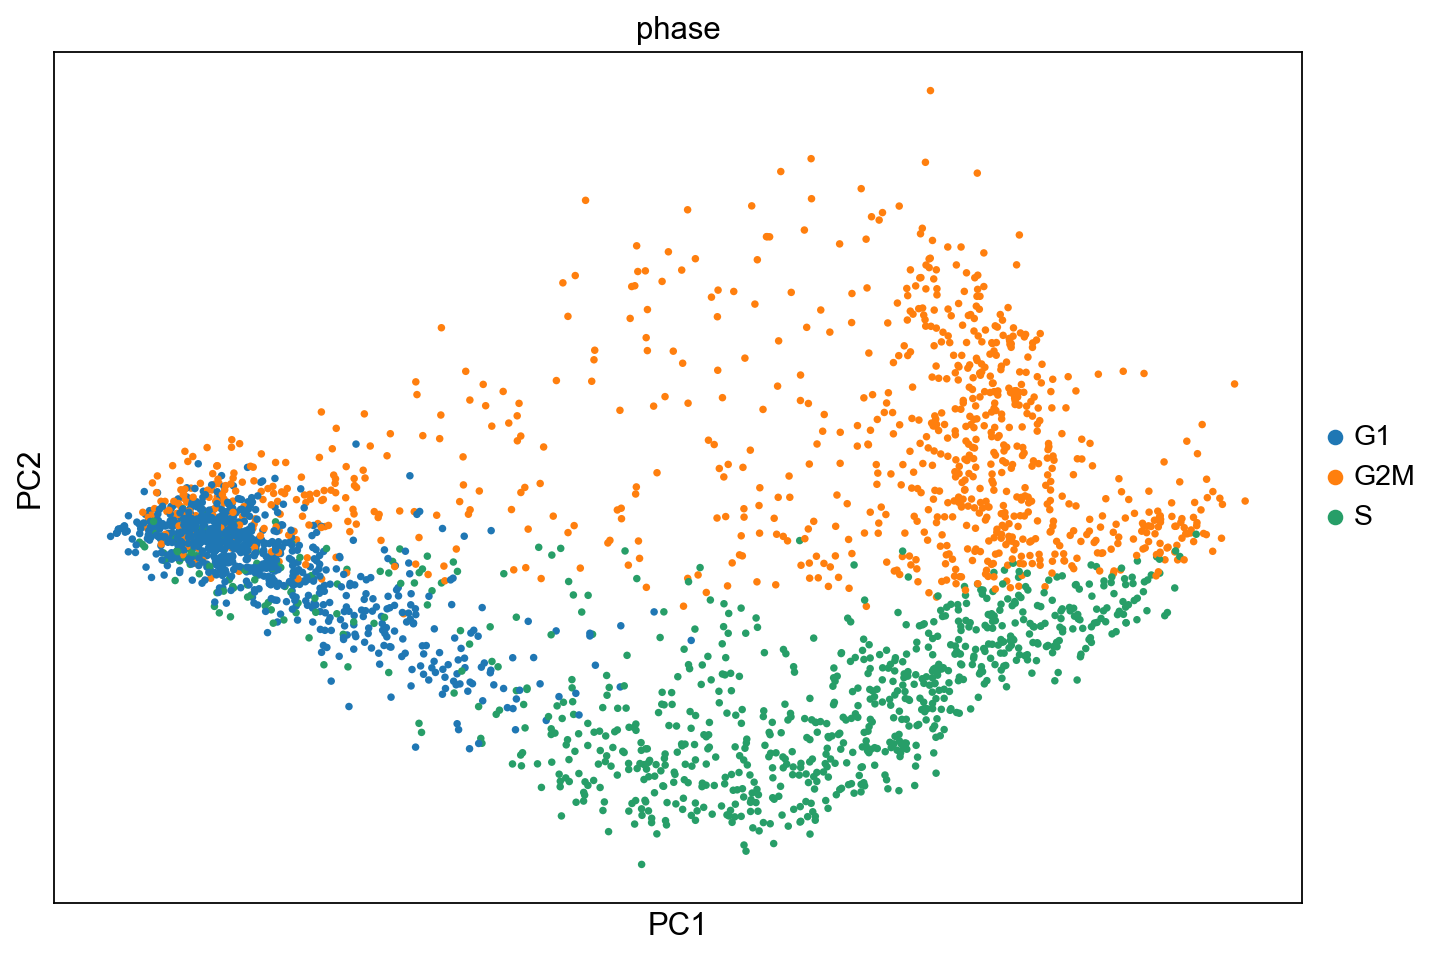

In [55]:
# Visualise PCA on cell cycle scores only
adata_cc_genes = adata_log[:, cell_cycle_genes]
sc.tl.pca(adata_cc_genes)
sc.pl.pca_scatter(adata_cc_genes, color='phase')

In [56]:
# Depending on PCA above, we can regress out cell cycle genes using the subsequent cells

sc.pp.regress_out(adata_log, ['S_score', 'G2M_score'])
sc.pp.scale(adata_log)

regressing out ['S_score', 'G2M_score']
    sparse input is densified and may lead to high memory use
    finished (0:00:16)


computing PCA
    with n_comps=50
    finished (0:00:00)


/Users/mairi.mcclean/mambaforge/envs/new_scanpy_local/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


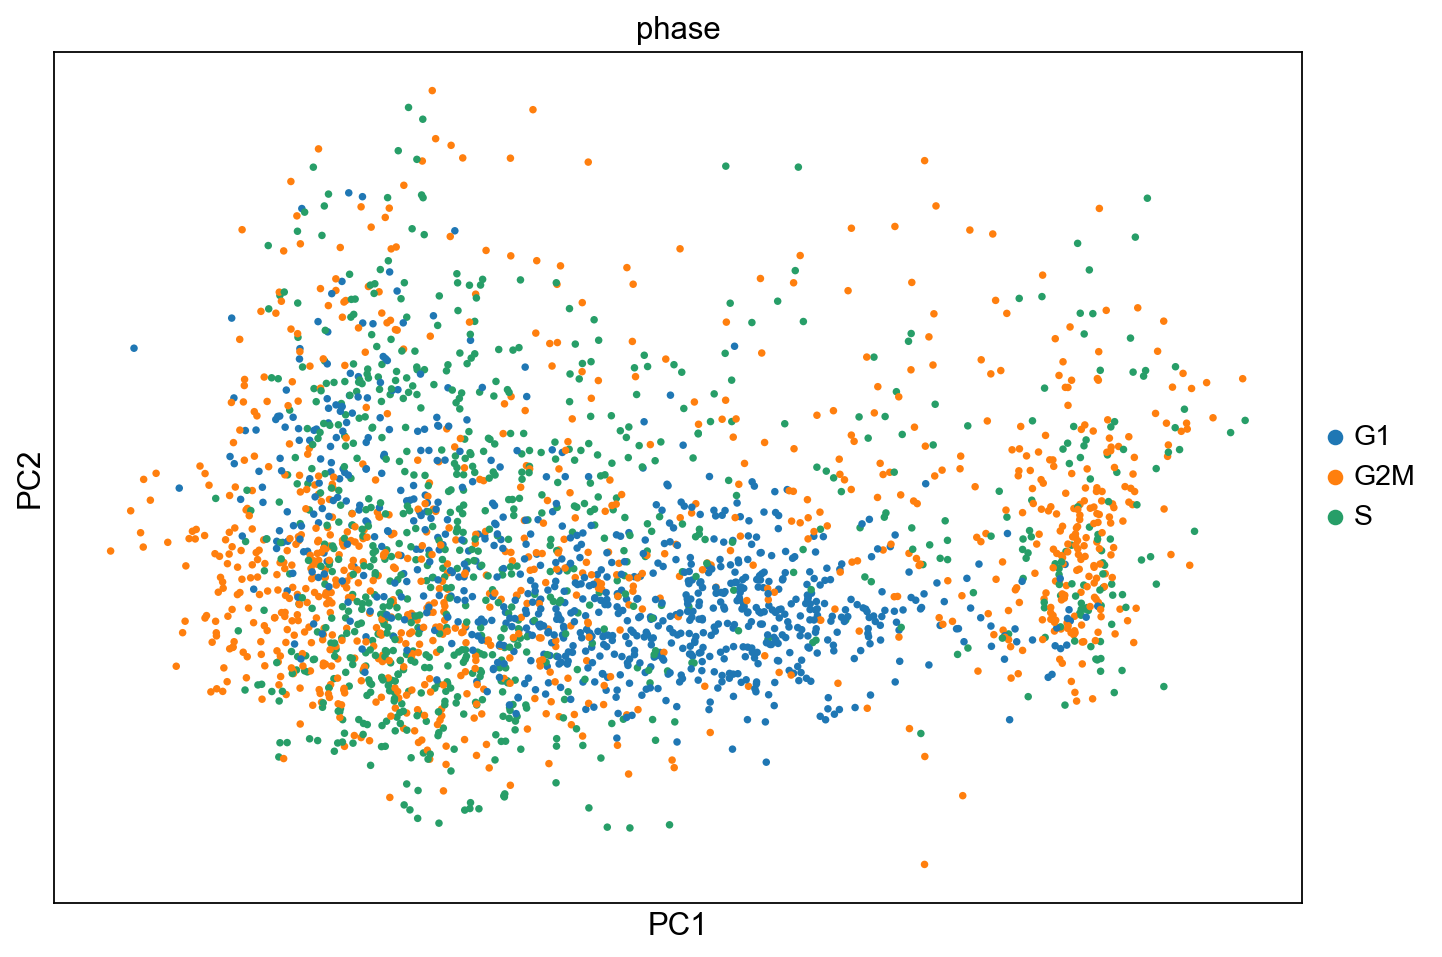

In [57]:
adata_cc_genes = adata_log[:, cell_cycle_genes]
sc.tl.pca(adata_cc_genes)
sc.pl.pca_scatter(adata_cc_genes, color='phase')

### Predict doublets

In [58]:
import scrublet

In [59]:
scrub = scrublet.Scrublet(sample_object.X)

Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.53
Detected doublet rate = 0.3%
Estimated detectable doublet fraction = 37.1%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 0.9%
Elapsed time: 1.6 seconds


(<Figure size 640x240 with 2 Axes>,
 array([<Axes: title={'center': 'Observed transcriptomes'}, xlabel='Doublet score', ylabel='Prob. density'>,
        <Axes: title={'center': 'Simulated doublets'}, xlabel='Doublet score', ylabel='Prob. density'>],
       dtype=object))

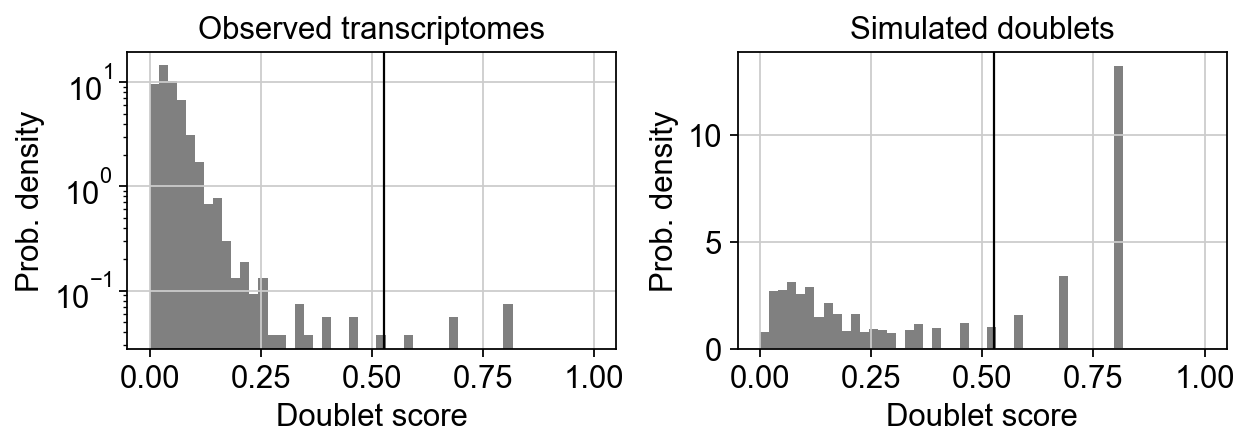

In [60]:
sample_object.obs['doublet_scores'], sample_object.obs['predicted_doublets'] = scrub.scrub_doublets()
scrub.plot_histogram()

In [61]:
sum(sample_object.obs['predicted_doublets'])

9

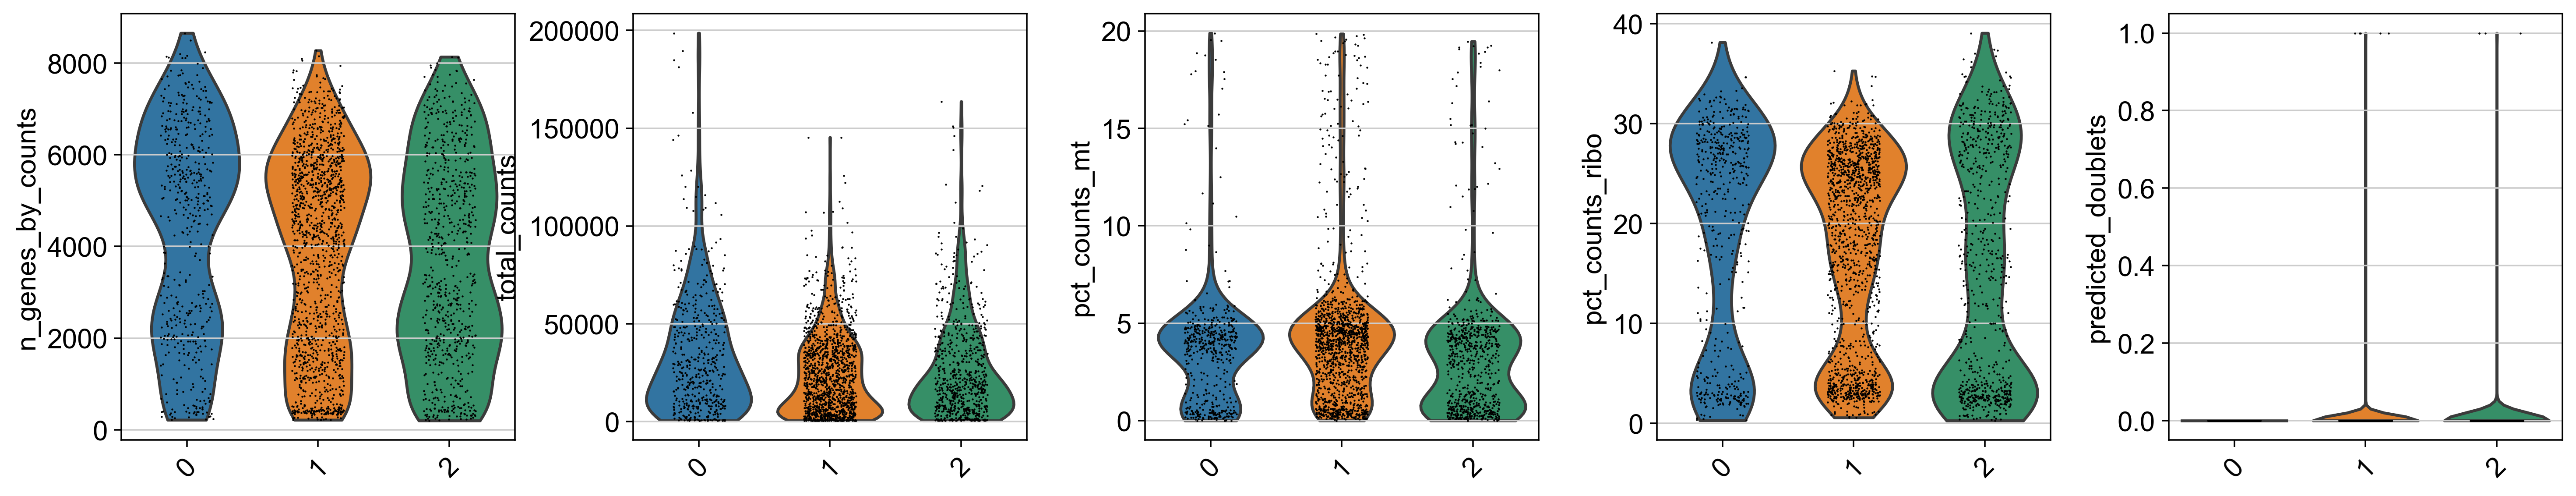

In [62]:
# Re-set figure params
sc.settings.set_figure_params(dpi = 160, color_map = 'RdPu', dpi_save = 180, vector_friendly = True, format = 'svg')

# Plot doublet detection results
sc.pl.violin(sample_object, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt','pct_counts_ribo', 'predicted_doublets'],
             jitter = 0.2, groupby = 'batch', rotation = 45, multi_panel=False)

### Prepare counts for individual slots

In [63]:
sample_object.raw = sample_object.copy()
sample_object.layers['counts'] = sample_object.X.copy()
sample_object.layers["sqrt_norm"] = np.sqrt(
    sc.pp.normalize_total(sample_object, inplace = False)["X"]
)
sample_object

normalizing counts per cell
    finished (0:00:00)


AnnData object with n_obs × n_vars = 2623 × 16174
    obs: 'batch', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'pct_counts_hb', 'mt_ok', 'percent_chrX', 'S_score', 'G2M_score', 'doublet_scores', 'predicted_doublets'
    var: 'gene_ids', 'n_cells', 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'batch_colors'
    layers: 'counts', 'sqrt_norm'

### Export object

In [64]:
sample_object.write('/Volumes/Lacie/data_lake/Mairi_example/processed_files/abridged_qc/mice/Bobba2022_mm230607.h5ad')